In [1]:
!pip3 install numpy pandas seaborn matplotlib sklearn

In [2]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
%matplotlib inline

#sns.set_palette("Accent")
sns.set_theme(style="darkgrid")

# Entrada de dados

## Treino

In [4]:
df_train = pd.read_csv(os.path.join(os.getcwd(), "data", "train.csv"))
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.2750,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.00,0,0,350043,7.7958,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.00,0,0,348124,7.6500,F G73,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.00,0,0,113804,30.5000,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.00,0,0,345781,9.5000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.00,0,0,PC 17595,28.7125,C49,C


In [5]:
print(f"O Conjunto de treino é composto por {len(df_train)} passageiros")

O Conjunto de treino é composto por 891 passageiros


## Teste

In [6]:
df_test = pd.read_csv(os.path.join(os.getcwd(), "data", "test.csv"))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analisando os dados de entrada

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### As colunas "Cabin", "Age" e "Embarked" apresentam valores nulos

### A classe dos passageiros influencia sua taxa de sobrevivencia?

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

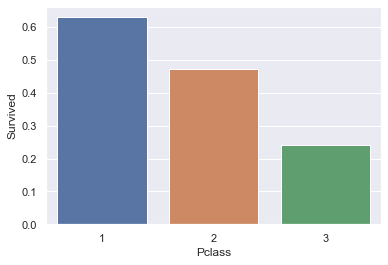

In [8]:
df = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x = "Pclass", y = "Survived", data = df)

### O sexo dos passageiros influencia sua taxa de sobrevivencia?

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

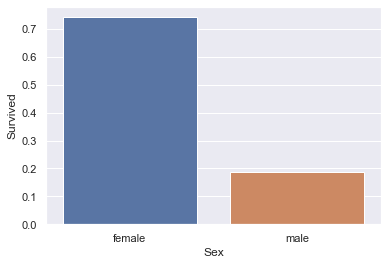

In [9]:
df = df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x = "Sex", y = "Survived", data = df)

### O n° de irmãos/cônjuges dos passageiros influencia sua taxa de sobrevivencia?

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

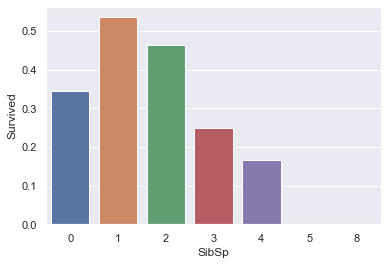

In [10]:
df = df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x = "SibSp", y = "Survived", data = df)

### O n° de pais/filhos dos passageiros influencia sua taxa de sobrevivencia?

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

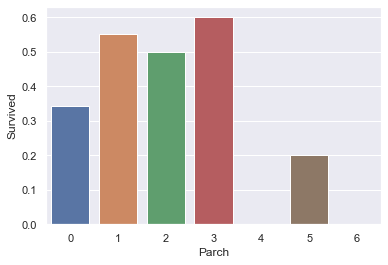

In [11]:
df = df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x = "Parch", y = "Survived", data = df)

In [12]:
os.listdir()

['.ipynb_checkpoints', 'data', 'titanic_ml_models.ipynb']